<h1><center>Home Credit Default Risk Risk Assessment</center></h1>

# Introduction

Many people struggle to get loans due to insufficient or non-existent credit histories. And, unfortunately, this population is often taken advantage of by untrustworthy lenders.

Home Credit strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. In order to make sure this under-served population has a positive loan experience, Home Credit makes use of a variety of alternative data including telco and transactional information to predict their clients' repayment abilities.

The main aim is to build a model to predict how capable each applicant is of repaying a loan, so that sanctioning loan only for the applicants who are likely to repay the loan. This a supervised classification problem. Classification is the process of predicting a new target variable's class on the basis of a training set of data containing observations (or instances) whose category membership is already known.It is considered as a form of supervised learning, i.e., learning where a training set of correctly identified observations is available. This classification in unsupervised procedure is known as clustering, and involves grouping data into categories based on some measure of inherent similarity or distance. 

The Classification problems are divided into two main categories:
- Binary Classification Problem: These problems have only 2 classifiers that can be 0/1 (Yes/No) or can be any other 2 categories.
- Multiple classification problems: These problems can have multiple classifiers.

In this notebook we deal with binary classification problem where the target variable is to predict whether the loan is repaid or not.

## Data Description

- <b>application_{train|test}.csv</b>
    - This is the main table, broken into two files for Train (with TARGET) and Test (without TARGET).
    - Static data for all applications. One row represents one loan in our data sample.

- <b>bureau.csv</b>
    - All client's previous credits provided by other financial institutions that were reported to Credit Bureau (for clients who have a loan in our sample).
    - For every loan in our sample, there are as many rows as number of credits the client had in Credit Bureau before the application date.

- <b>bureau_balance.csv</b>

    - Monthly balances of previous credits in Credit Bureau.
    - This table has one row for each month of history of every previous credit reported to Credit Bureau – i.e the table has (#loans in sample * # of relative previous credits * # of months where we have some history observable for the previous credits) rows.

- <b>POS_CASH_balance.csv</b>

    - Monthly balance snapshots of previous POS (point of sales) and cash loans that the applicant had with Home Credit.
    - This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credits * # of months in which we have some history observable for the previous credits) rows.

- <b>credit_card_balance.csv</b>

    - Monthly balance snapshots of previous credit cards that the applicant has with Home Credit.
    - This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credit cards * # of months where we have some history observable for the previous credit card) rows.

- <b>previous_application.csv</b>

    - All previous applications for Home Credit loans of clients who have loans in our sample.
    - There is one row for each previous application related to loans in our data sample.

- <b>installments_payments.csv</b>

    - Repayment history for the previously disbursed credits in Home Credit related to the loans in our sample.
    - There is a) one row for every payment that was made plus b) one row each for missed payment.
    - One row is equivalent to one payment of one installment OR one installment corresponding to one payment of one previous Home Credit credit related to loans in our sample.

- <b>HomeCredit_columns_description.csv</b>
    - This file contains descriptions for the columns in the various data files.
    
<br>

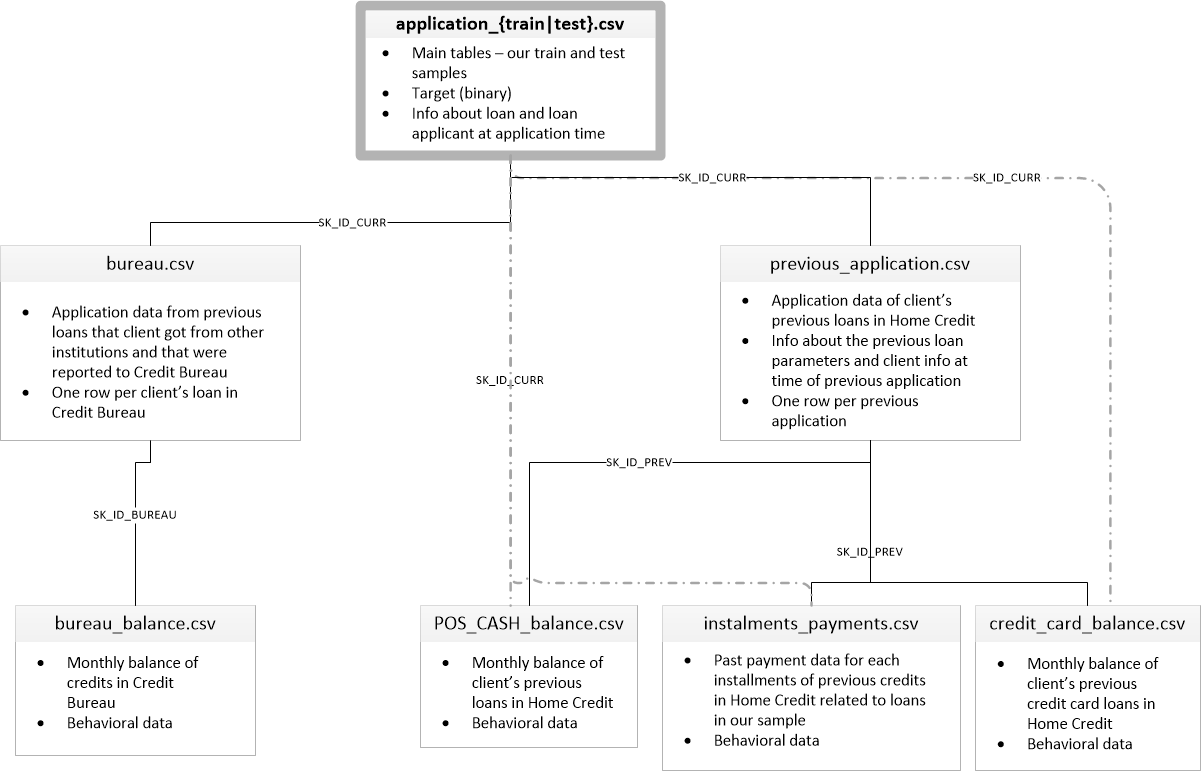

## Imports

In [1]:
import os
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot

from sklearn.preprocessing import LabelEncoder

## Reading the Data

In [2]:
app_train = pd.read_csv('home-credit-default-risk/application_train.csv')
print('Training data shape: ', app_train.shape)
app_train.head()

Training data shape:  (307511, 122)


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

The training data has 307511 observations (each one a separate loan) and 122 features (variables) including the TARGET (the label we want to predict).

In [3]:
app_test = pd.read_csv('home-credit-default-risk/application_test.csv')
print('Testing data shape: ', app_test.shape)
app_test.head()

Testing data shape:  (48744, 121)


SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

   ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                0                0                0                0   
1  ...                0                0                0                0   
2  ...                0                0                0                0   
3  ...                0                0                0                0   
4  ...                0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         0.0  
1                        0.0                         3.0  
2                        1.0                         4.0  
3                        0.0                         3.0  
4                        NaN                         NaN  

[5 rows x 121 columns]

### Examine Missing Values

In [4]:
def display_missing_data(df):
        ms_sum = df.isnull().sum()
        ms_percent = 100 * df.isnull().sum() / len(df)
        ms_df = pd.concat([ms_sum, ms_percent], axis=1)        
        ms_df1 = ms_df.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        ms_df1 = ms_df1[ms_df1.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)
        print (f"Total Columns: {str(df.shape[1])}")
        print(f"Found Missing Values in {str(ms_df1.shape[0])} columns")        
        return ms_df1

In [5]:
display_missing_data(app_train)

Total Columns: 122
Found Missing Values in 67 columns


Missing Values  % of Total Values
COMMONAREA_MEDI                   214865               69.9
COMMONAREA_AVG                    214865               69.9
COMMONAREA_MODE                   214865               69.9
NONLIVINGAPARTMENTS_MEDI          213514               69.4
NONLIVINGAPARTMENTS_MODE          213514               69.4
...                                  ...                ...
EXT_SOURCE_2                         660                0.2
AMT_GOODS_PRICE                      278                0.1
AMT_ANNUITY                           12                0.0
CNT_FAM_MEMBERS                        2                0.0
DAYS_LAST_PHONE_CHANGE                 1                0.0

[67 rows x 2 columns]

## Column Data Types

In [6]:
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

# Data Visualizations

Exploratory data analysis is an approach to analyzing data sets to summarize their main characteristics, often with visual methods.

### Target Variable Distribution

In [7]:
x = app_train['TARGET'].value_counts()
labels = ['Loan Not Repaid', 'Loan Repaid']
fig = go.Figure(data=[
    go.Pie(labels=labels,
           values=x,
           textinfo='label+percent',
           insidetextorientation='radial')
])
fig.show()

On seeing the above graph we can say that the data is highly imbalanced. The loan which are repaid are very less compared ones that are not repayed. Once we get into more sophisticated machine learning models, we can weight the classes by their representation in the data to reflect this imbalance.

### Types of Loan 

In [8]:
import plotly
t1 = app_train.loc[app_train['TARGET'] != 0]
t0 = app_train.loc[app_train['TARGET'] == 0]

labels = ['Cash Loans', 'Revolving Loans']

fig = plotly.subplots.make_subplots(
    rows=1,
    cols=3,
    specs=[[{'type': 'domain'}, {'type': 'domain'}, {'type': 'domain'}]],
    subplot_titles=['Overall distribution', 'Target specific (t=1)', 'Target specific (t=0)'])

fig.add_trace(
    go.Pie(
        labels=labels,
        values=app_train['NAME_CONTRACT_TYPE'].value_counts(),
        name="Overall"), 1, 1)
fig.add_trace(
    go.Pie(labels=labels,
           values=t1['NAME_CONTRACT_TYPE'].value_counts(),
           name="Not returned loan(t=1)"), 1, 2)
fig.add_trace(
    go.Pie(labels=labels,
           values=t0['NAME_CONTRACT_TYPE'].value_counts(),
           name="Returned Loan(t=0)"), 1, 3)

fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Types of Loans",
    annotations=[dict(text='Overall', x=0.14, y=0.46, font_size=20, showarrow=False),
                 dict(text='T = 1', x=0.50, y=0.46, font_size=20, showarrow=False),
                 dict(text='T = 0', x=0.85, y=0.46, font_size=20, showarrow=False)]
)

fig.layout.template = 'plotly_white'
fig.show()

### Gender of the applicants

In [9]:
t1 = app_train.loc[app_train['TARGET'] != 0]
t0 = app_train.loc[app_train['TARGET'] == 0]

labels = ['Male', 'Female']

fig = plotly.subplots.make_subplots(rows=1, cols=3,
                    specs=[[{'type': 'domain'}, {'type': 'domain'}, {'type': 'domain'}]],
                    subplot_titles=['Overall distribution', 'Target specific (t=1)', 'Target specific (t=0)'])
fig.add_trace(go.Pie(labels=labels,
                     values=app_train['CODE_GENDER'].value_counts(),
                     name="Overall"), 1, 1)
fig.add_trace(go.Pie(labels=labels,
                     values=t1['CODE_GENDER'].value_counts(),
                     name="Not returned loan(t=1)"), 1, 2)
fig.add_trace(go.Pie(labels=labels,
                     values=t0['CODE_GENDER'].value_counts(),
                     name="Returned Loan(t=0)"), 1, 3)

fig.update_traces(hole=.4, hoverinfo="label+percent+name")
fig.update_layout(
    title_text="Types of Loans",
    annotations=[dict(text='Overall', x=0.14, y=0.46, font_size=20, showarrow=False),
                 dict(text='T = 1', x=0.50, y=0.46, font_size=20, showarrow=False),
                 dict(text='T = 0', x=0.85, y=0.46, font_size=20, showarrow=False)])

fig.layout.template = 'plotly_white'
fig.show()

## Client's Income Type

Let's investigate the numbers of clients with different income type. As well, let's see the percent of not returned loans per income type of applicants.

In [10]:
income_val = app_train['NAME_INCOME_TYPE'].value_counts()
income_val_y0 = []
income_val_y1 = []

for val in income_val.index:
    income_val_y1.append(
        np.sum(app_train['TARGET'][app_train['NAME_INCOME_TYPE'] == val] == 1))
    income_val_y0.append(
        np.sum(app_train['TARGET'][app_train['NAME_INCOME_TYPE'] == val] == 0))

    data = [
        go.Bar(x=income_val.index,
               y=((income_val_y1 / income_val.sum()) * 100),
               name='Yes'),
        go.Bar(x=income_val.index,
               y=((income_val_y0 / income_val.sum()) * 100),
               name='No')
    ]

layout = go.Layout(
    title="Income sources of Applicants in terms of loan is repayed or not  in %",
    xaxis=dict(title='Income source', ),
    yaxis=dict(title='Count of applicants in %', )
)

fig = go.Figure(data=data, layout=layout)
fig.layout.template = 'plotly_white'
plotly.offline.iplot(fig)

### Distribution of Education 

Distribution of education of the applicant in terms of loan repaid or not. People with Academic Degree are more likely to repay the loan(Out of 164, only 3 applicants are not able to repay)

In [11]:
education_val = app_train['NAME_EDUCATION_TYPE'].value_counts()
education_val_y0 = []
education_val_y1 = []
for val in education_val.index:
    education_val_y1.append(np.sum(app_train['TARGET'][app_train['NAME_EDUCATION_TYPE']==val] == 1))
    education_val_y0.append(np.sum(app_train['TARGET'][app_train['NAME_EDUCATION_TYPE']==val] == 0))
data = [go.Bar(x = education_val.index, y = ((education_val_y1 / education_val.sum()) * 100), name='Yes' ),
        go.Bar(x = education_val.index, y = ((education_val_y0 / education_val.sum()) * 100), name='No' )]
layout = go.Layout(
    title = "Education sources of Applicants in terms of loan is repayed or not  in %",
    xaxis=dict(
        title='Education of Applicants',
       ),
    yaxis=dict(
        title='Count of applicants in %',
        )
)
fig = go.Figure(data = data, layout=layout) 
fig.layout.template = 'plotly_white'
plotly.offline.iplot(fig)

## Distribution of Housing type

In [12]:
housing_val = app_train['NAME_HOUSING_TYPE'].value_counts()
housing_val_y0 = []
housing_val_y1 = []

for val in housing_val.index:
    housing_val_y1.append(
        np.sum(app_train['TARGET'][app_train['NAME_HOUSING_TYPE'] == val] == 1))
    housing_val_y0.append(
        np.sum(app_train['TARGET'][app_train['NAME_HOUSING_TYPE'] == val] == 0))

data = [
    go.Bar(x=housing_val.index,
           y=((housing_val_y1 / housing_val.sum()) * 100),
           name='Yes'),
    go.Bar(x=housing_val.index,
           y=((housing_val_y0 / housing_val.sum()) * 100),
           name='No')
]

layout = go.Layout(
    title="Types of House which the applicants applied for loan in terms of loan repayed or not",
    xaxis=dict(title='Housing of Applicants', ),
    yaxis=dict(title='Count of applicants in %', )
)

fig = go.Figure(data=data, layout=layout)
fig.layout.template = 'plotly_white'
plotly.offline.iplot(fig)

## Distribution of Family Status 

In [13]:
family_val = app_train['NAME_FAMILY_STATUS'].value_counts()
family_val_y0 = []
family_val_y1 = []

for val in family_val.index:
    family_val_y1.append(
        np.sum(app_train['TARGET'][app_train['NAME_FAMILY_STATUS'] == val] == 1))
    family_val_y0.append(
        np.sum(app_train['TARGET'][app_train['NAME_FAMILY_STATUS'] == val] == 0))

data = [
    go.Bar(x=family_val.index,
           y=((family_val_y1 / family_val.sum()) * 100),
           name='Yes'),
    go.Bar(x=family_val.index,
           y=((family_val_y0 / family_val.sum()) * 100),
           name='No')
]

layout = go.Layout(
    title="Family Status of Applicants in terms of loan repayed or not",
    xaxis=dict(title='Family Status of Applicants', ),
    yaxis=dict(title='Count of applicants in %', )
)

fig = go.Figure(data=data, layout=layout)
fig.layout.template = 'plotly_white'
plotly.offline.iplot(fig)

## Occupation of the applicant

In [14]:
occupation_val = app_train['OCCUPATION_TYPE'].value_counts()
occupation_val_y0 = []
occupation_val_y1 = []

for val in occupation_val.index:
    occupation_val_y1.append(
        np.sum(app_train['TARGET'][app_train['OCCUPATION_TYPE']== val] == 1))
    occupation_val_y0.append(
        np.sum(app_train['TARGET'][app_train['OCCUPATION_TYPE']== val] == 0))

data = [
    go.Bar(x=occupation_val.index,
           y=((occupation_val_y1 / occupation_val.sum()) * 100),
           name='Yes'),
    go.Bar(x=occupation_val.index,
           y=((occupation_val_y0 / occupation_val.sum()) * 100),
           name='No')
]

layout = go.Layout(
    title="Types of occupation of Applicants in terms of loan is repayed or not",
    xaxis=dict(title='Occupations', ),
    yaxis=dict(title='Count of applicants in %', )
)

fig = go.Figure(data=data, layout=layout)
fig.layout.template = 'plotly_white'
plotly.offline.iplot(fig)

## Distribution of various other numerical columns

<Figure size 432x288 with 0 Axes>

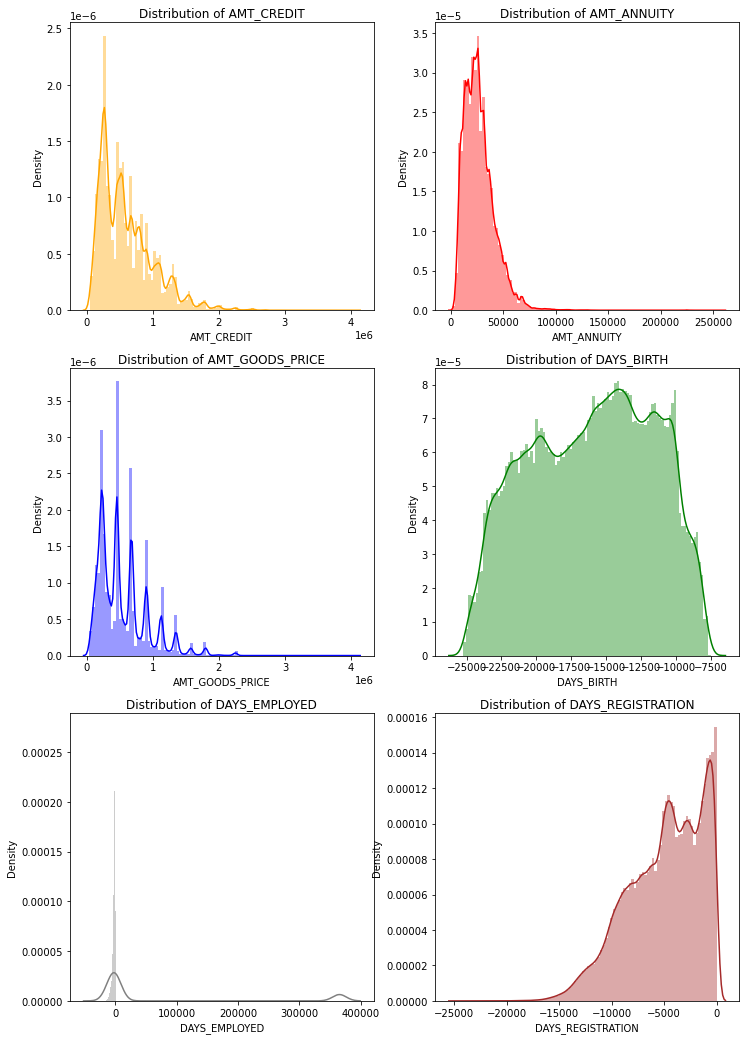

In [15]:
plt.figure()
fig, ax = plt.subplots(3,2,figsize=(12,18))
plt.subplot(3,2,1)
plt.title("Distribution of %s" % 'AMT_CREDIT')
sns.distplot(app_train['AMT_CREDIT'].dropna(),color='orange', kde=True,bins=100)

plt.subplot(3,2,2)
plt.title("Distribution of %s" % 'AMT_ANNUITY')
sns.distplot(app_train['AMT_ANNUITY'].dropna(),color='red', kde=True,bins=100)

plt.subplot(3,2,3)
plt.title("Distribution of %s" % 'AMT_GOODS_PRICE')
sns.distplot(app_train['AMT_GOODS_PRICE'].dropna(),color='blue', kde=True,bins=100)

plt.subplot(3,2,4)
plt.title("Distribution of %s" % 'DAYS_BIRTH')
sns.distplot(app_train['DAYS_BIRTH'].dropna(),color='green', kde=True,bins=100)

plt.subplot(3,2,5)
plt.title("Distribution of %s" % 'DAYS_EMPLOYED')
sns.distplot(app_train['DAYS_EMPLOYED'].dropna(),color='grey', kde=True,bins=500)

plt.subplot(3,2,6)
plt.title("Distribution of %s" % 'DAYS_REGISTRATION')
sns.distplot(app_train['DAYS_REGISTRATION'].dropna(),color='brown', kde=True,bins=100)
plt.show()

## Comparison of the interval values with the target

<Figure size 432x288 with 0 Axes>

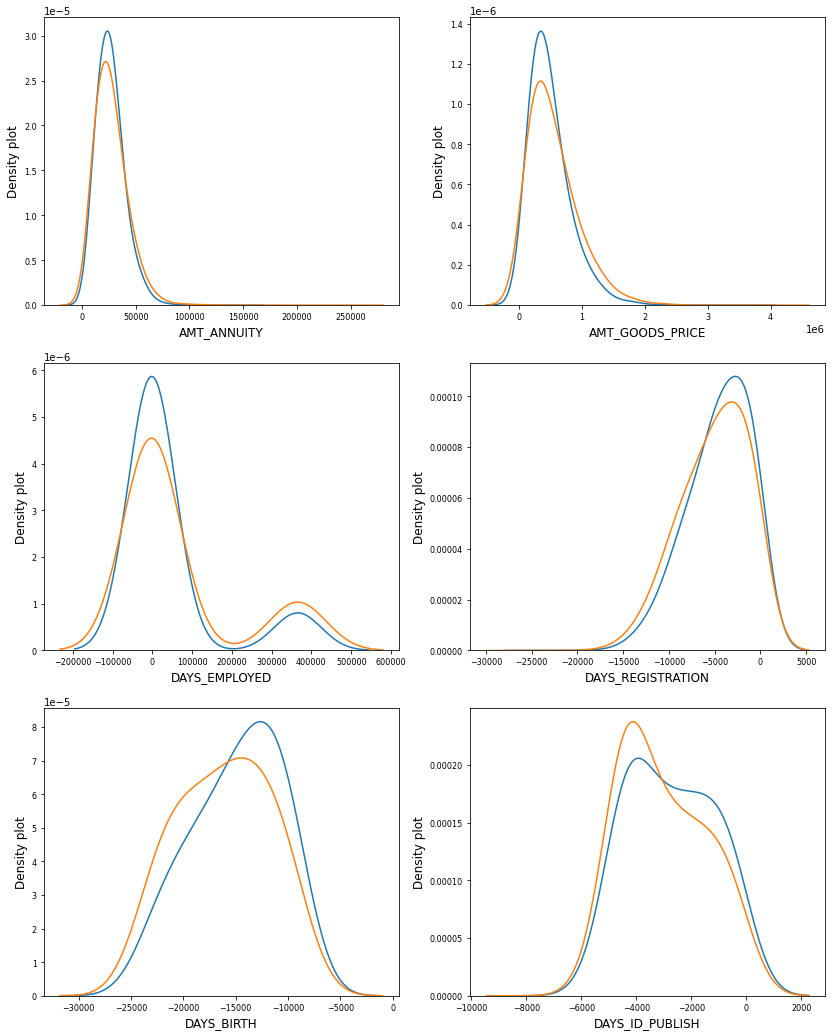

In [16]:
t1 = app_train.loc[app_train['TARGET'] != 0]
t0 = app_train.loc[app_train['TARGET'] == 0]

plt.figure()
fig, ax = plt.subplots(3, 2, figsize=(14, 18))
plt.subplot(3, 2, 1)
sns.kdeplot(t1['AMT_ANNUITY'], bw=0.5, label="TARGET = 1")
sns.kdeplot(t0['AMT_ANNUITY'], bw=0.5, label="TARGET = 0")
plt.ylabel('Density plot', fontsize=12)
plt.xlabel('AMT_ANNUITY', fontsize=12)
locs, labels = plt.xticks()
plt.tick_params(axis='both', which='major', labelsize=8)

plt.subplot(3, 2, 2)
sns.kdeplot(t1['AMT_GOODS_PRICE'], bw=0.5, label="TARGET = 1")
sns.kdeplot(t0['AMT_GOODS_PRICE'], bw=0.5, label="TARGET = 0")
plt.ylabel('Density plot', fontsize=12)
plt.xlabel('AMT_GOODS_PRICE', fontsize=12)
locs, labels = plt.xticks()
plt.tick_params(axis='both', which='major', labelsize=8)

plt.subplot(3, 2, 3)
sns.kdeplot(t1['DAYS_EMPLOYED'], bw=0.5, label="TARGET = 1")
sns.kdeplot(t0['DAYS_EMPLOYED'], bw=0.5, label="TARGET = 0")
plt.ylabel('Density plot', fontsize=12)
plt.xlabel('DAYS_EMPLOYED', fontsize=12)
locs, labels = plt.xticks()
plt.tick_params(axis='both', which='major', labelsize=8)

plt.subplot(3, 2, 4)
sns.kdeplot(t1['DAYS_REGISTRATION'], bw=0.5, label="TARGET = 1")
sns.kdeplot(t0['DAYS_REGISTRATION'], bw=0.5, label="TARGET = 0")
plt.ylabel('Density plot', fontsize=12)
plt.xlabel('DAYS_REGISTRATION', fontsize=12)
locs, labels = plt.xticks()
plt.tick_params(axis='both', which='major', labelsize=8)

plt.subplot(3, 2, 5)
sns.kdeplot(t1['DAYS_BIRTH'], bw=0.5, label="TARGET = 1")
sns.kdeplot(t0['DAYS_BIRTH'], bw=0.5, label="TARGET = 0")
plt.ylabel('Density plot', fontsize=12)
plt.xlabel('DAYS_BIRTH', fontsize=12)
locs, labels = plt.xticks()
plt.tick_params(axis='both', which='major', labelsize=8)

plt.subplot(3, 2, 6)
sns.kdeplot(t1['DAYS_ID_PUBLISH'], bw=0.5, label="TARGET = 1")
sns.kdeplot(t0['DAYS_ID_PUBLISH'], bw=0.5, label="TARGET = 0")
plt.ylabel('Density plot', fontsize=12)
plt.xlabel('DAYS_ID_PUBLISH', fontsize=12)
locs, labels = plt.xticks()
plt.tick_params(axis='both', which='major', labelsize=8)

plt.show()

## Selecting Feature and Target columns

In [17]:
columns = [
"TARGET", "NAME_CONTRACT_TYPE", "CODE_GENDER", 
"FLAG_OWN_CAR", "FLAG_OWN_REALTY", "CNT_CHILDREN", "AMT_INCOME_TOTAL", 
"AMT_CREDIT", "AMT_ANNUITY", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", 
"NAME_FAMILY_STATUS", "DAYS_EMPLOYED", "CNT_FAM_MEMBERS", 
"REGION_RATING_CLIENT", "REGION_RATING_CLIENT_W_CITY", 
"WEEKDAY_APPR_PROCESS_START", "AMT_REQ_CREDIT_BUREAU_HOUR", 
"AMT_REQ_CREDIT_BUREAU_DAY", "AMT_REQ_CREDIT_BUREAU_WEEK", 
"AMT_REQ_CREDIT_BUREAU_MON", "AMT_REQ_CREDIT_BUREAU_QRT", 
"AMT_REQ_CREDIT_BUREAU_YEAR"
]

In [18]:
df = app_train[columns]

In [19]:
df

TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0            1         Cash loans           M            N               Y   
1            0         Cash loans           F            N               N   
2            0    Revolving loans           M            Y               Y   
3            0         Cash loans           F            N               Y   
4            0         Cash loans           M            N               Y   
...        ...                ...         ...          ...             ...   
307506       0         Cash loans           M            N               N   
307507       0         Cash loans           F            N               Y   
307508       0         Cash loans           F            N               Y   
307509       1         Cash loans           F            N               Y   
307510       0         Cash loans           F            N               N   

        CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                  0          202500.0    406597.5      24700.5   
1                  0          270000.0   1293502.5      35698.5   
2                  0           67500.0    135000.0       6750.0   
3                  0          135000.0    312682.5      29686.5   
4                  0          121500.0    513000.0      21865.5   
...              ...               ...         ...          ...   
307506             0          157500.0    254700.0      27558.0   
307507             0           72000.0    269550.0      12001.5   
307508             0          153000.0    677664.0      29979.0   
307509             0          171000.0    370107.0      20205.0   
307510             0          157500.0    675000.0      49117.5   

            NAME_INCOME_TYPE  ... CNT_FAM_MEMBERS REGION_RATING_CLIENT  \
0                    Working  ...             1.0                    2   
1              State servant  ...             2.0                    1   
2                    Working  ...             1.0                    2   
3                    Working  ...             2.0                    2   
4                    Working  ...             1.0                    2   
...                      ...  ...             ...                  ...   
307506               Working  ...             1.0                    1   
307507             Pensioner  ...             1.0                    2   
307508               Working  ...             1.0                    3   
307509  Commercial associate  ...             2.0                    2   
307510  Commercial associate  ...             2.0                    1   

        REGION_RATING_CLIENT_W_CITY  WEEKDAY_APPR_PROCESS_START  \
0                                 2                   WEDNESDAY   
1                                 1                      MONDAY   
2                                 2                      MONDAY   
3                                 2                   WEDNESDAY   
4                                 2                    THURSDAY   
...                             ...                         ...   
307506                            1                    THURSDAY   
307507                            2                      MONDAY   
307508                            3                    THURSDAY   
307509                            2                   WEDNESDAY   
307510                            1                    THURSDAY   

        AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                              0.0                        0.0   
1                              0.0                        0.0   
2                              0.0                        0.0   
3                              NaN                        NaN   
4                              0.0                        0.0   
...                            ...                        ...   
307506                         NaN                        NaN   
307507                         NaN                  

## Sampling Subset of the Data

In [20]:
df = df[(df["TARGET"] == 1)]

In [21]:
df.shape

(24825, 23)

## Correlation Heat Map

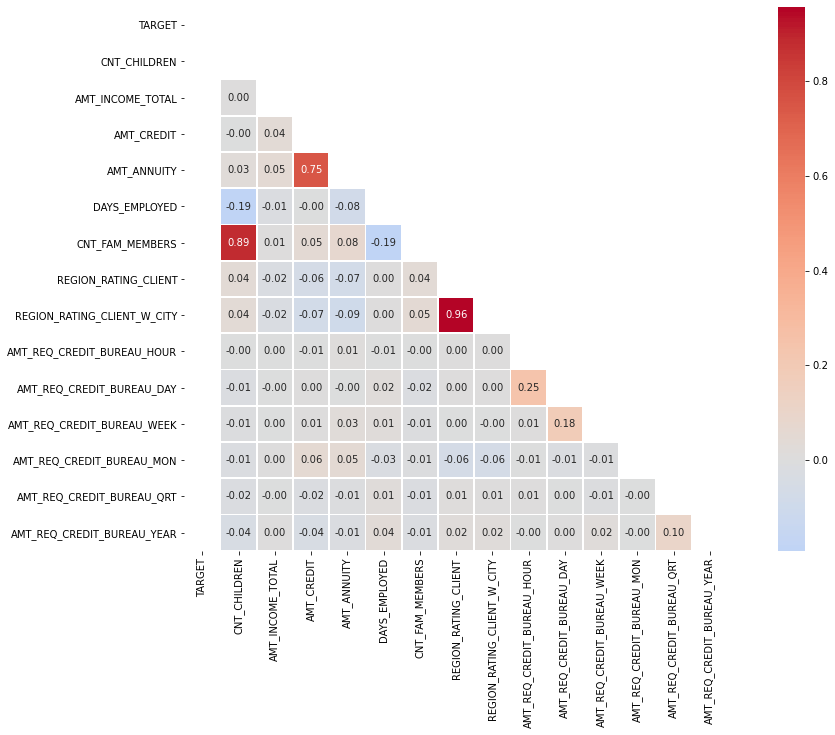

In [22]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(18, 10))
sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=True, center=0, fmt=".2f", square=True, linewidths=.7)
plt.show()

## Handling Missing data

In [23]:
display_missing_data(df)

Total Columns: 23
Found Missing Values in 6 columns


Missing Values  % of Total Values
AMT_REQ_CREDIT_BUREAU_HOUR            4292               17.3
AMT_REQ_CREDIT_BUREAU_DAY             4292               17.3
AMT_REQ_CREDIT_BUREAU_WEEK            4292               17.3
AMT_REQ_CREDIT_BUREAU_MON             4292               17.3
AMT_REQ_CREDIT_BUREAU_QRT             4292               17.3
AMT_REQ_CREDIT_BUREAU_YEAR            4292               17.3

### Filling missing values with mean of the column

In [24]:
df.fillna(df.mean(), inplace=True)

In [25]:
display_missing_data(df)

Total Columns: 23
Found Missing Values in 0 columns


Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []

In [26]:
df.head(5)

TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0        1         Cash loans           M            N               Y   
26       1         Cash loans           F            N               Y   
40       1         Cash loans           M            N               Y   
42       1         Cash loans           F            N               N   
81       1         Cash loans           F            N               Y   

    CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0              0          202500.0    406597.5      24700.5   
26             0          112500.0    979992.0      27076.5   
40             0          202500.0   1193580.0      35028.0   
42             0          135000.0    288873.0      16258.5   
81             0           81000.0    252000.0      14593.5   

        NAME_INCOME_TYPE  ... CNT_FAM_MEMBERS REGION_RATING_CLIENT  \
0                Working  ...             1.0                    2   
26               Working  ...             1.0                    3   
40  Commercial associate  ...             2.0                    2   
42               Working  ...             2.0                    3   
81             Pensioner  ...             2.0                    2   

    REGION_RATING_CLIENT_W_CITY  WEEKDAY_APPR_PROCESS_START  \
0                             2                   WEDNESDAY   
26                            2                      MONDAY   
40                            2                     TUESDAY   
42                            3                    THURSDAY   
81                            2                    THURSDAY   

    AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                          0.0                        0.0   
26                         0.0                        0.0   
40                         0.0                        0.0   
42                         0.0                        0.0   
81                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
26                        0.0                        0.0   
40                        0.0                        2.0   
42                        0.0                        0.0   
81                        0.0                        0.0   

    AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                         0.0                         1.0  
26                        2.0                         2.0  
40                        0.0                         4.0  
42                        0.0                         2.0  
81                        0.0                         0.0  

[5 rows x 23 columns]

## Column Encoder

In [27]:
class MultiColumnLabelEncoder:
    def __init__(self, columns=None):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname, col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self, X, y=None):
        return self.fit(X, y).transform(X)

In [28]:
encode_column_list = [
    'NAME_CONTRACT_TYPE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
    'NAME_FAMILY_STATUS', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
    'WEEKDAY_APPR_PROCESS_START'
]

In [29]:
encoded_df = MultiColumnLabelEncoder(columns = encode_column_list).fit_transform(df)

In [30]:
encoded_df

TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0            1                   0            1             0   
26           1                   0            0             0   
40           1                   0            1             0   
42           1                   0            0             0   
81           1                   0            0             0   
...        ...                 ...          ...           ...   
307448       1                   0            1             0   
307475       1                   0            0             0   
307481       1                   0            1             0   
307489       1                   0            0             0   
307509       1                   0            0             0   

        FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                     1             0          202500.0    406597.5   
26                    1             0          112500.0    979992.0   
40                    1             0          202500.0   1193580.0   
42                    0             0          135000.0    288873.0   
81                    1             0           81000.0    252000.0   
...                 ...           ...               ...         ...   
307448                0             1          207000.0    450000.0   
307475                0             1          144000.0   1303200.0   
307481                1             0          225000.0    297000.0   
307489                1             0          225000.0    521280.0   
307509                1             0          171000.0    370107.0   

        AMT_ANNUITY  NAME_INCOME_TYPE  ...  CNT_FAM_MEMBERS  \
0           24700.5                 5  ...              1.0   
26          27076.5                 5  ...              1.0   
40          35028.0                 0  ...              2.0   
42          16258.5                 5  ...              2.0   
81          14593.5                 2  ...              2.0   
...             ...               ...  ...              ...   
307448      32746.5                 5  ...              3.0   
307475      46809.0                 5  ...              3.0   
307481      19975.5                 5  ...              2.0   
307489      23089.5                 0  ...              2.0   
307509      20205.0                 0  ...              2.0   

        REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                          2                            2   
26                         3                            2   
40                         2                            2   
42                         3                            3   
81                         2                            2   
...                      ...                          ...   
307448                     3                            3   
307475                     2                            2   
307481                     2                            2   
307489                     2                            2   
307509                     2                            2   

        WEEKDAY_APPR_PROCESS_START  AMT_REQ_CREDIT_BUREAU_HOUR  \
0                                6                         0.0   
26                               1                         0.0   
40                               5                         0.0   
42                               4                         0.0   
81                               4                         0.0   
...                            ...                         ...   
307448                           1                         0.0   
307475                           4                         0.0   
307481                           0                         0.0   
307489                           0                         0.0   
307509                           6                         0.0   

        AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
0                         

## Splitting the data into Features and Target

In [31]:
X = encoded_df.iloc[:, 1:]
y = encoded_df.iloc[:, :1]

In [32]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 10)

## Standardizing the Features

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fuzzy C-means Clustering (FCM) 

In [34]:
import skfuzzy as fuzz

In [35]:
from sklearn.decomposition import PCA

In [36]:
pca = PCA(n_components=2).fit_transform(X_scaled)
results = pd.DataFrame(pca,columns=['pca1','pca2'])

In [37]:
alldata = np.vstack((results['pca1'], results['pca2']))

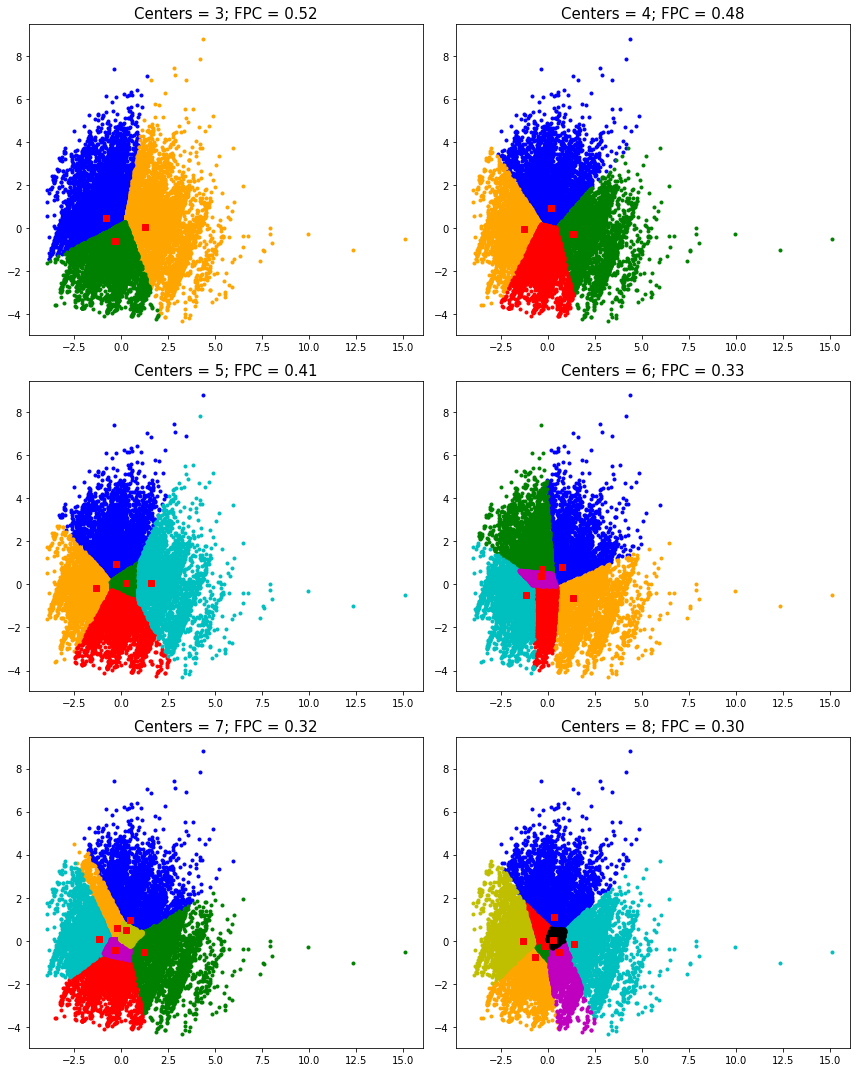

In [38]:
fpcs = []
num_centers = []
colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']
fig, axes = plt.subplots(3, 2, figsize=(12, 15))
for ncenters, ax in enumerate(axes.reshape(-1), 3):
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(alldata, ncenters, 2,
                                                     error=0.005, maxiter=10, init=None)
    fpcs.append(fpc)
    num_centers.append(ncenters)
    cluster_membership = np.argmax(u, axis=0)
    for j in range(ncenters):
        ax.plot(results['pca1'][cluster_membership == j],
                results['pca2'][cluster_membership == j], '.', color=colors[j])
    for pt in cntr:
        ax.plot(pt[0], pt[1], 'rs')
    ax.set_title(f'Centers = {ncenters}; FPC = {fpc:.2f}', fontsize=15)
fig.tight_layout()

In [39]:
print("Fuzzy Clustering Clusters Summary:\n")
for i in range(len(fpcs)):
    print(f"Num of Clusters: {num_centers[i]} FPC Score: {fpcs[i]}")

Fuzzy Clustering Clusters Summary:

Num of Clusters: 3 FPC Score: 0.5176983682370748
Num of Clusters: 4 FPC Score: 0.4781724714398397
Num of Clusters: 5 FPC Score: 0.41137831485398063
Num of Clusters: 6 FPC Score: 0.33497306978836844
Num of Clusters: 7 FPC Score: 0.3206506487319508
Num of Clusters: 8 FPC Score: 0.30420708334618235


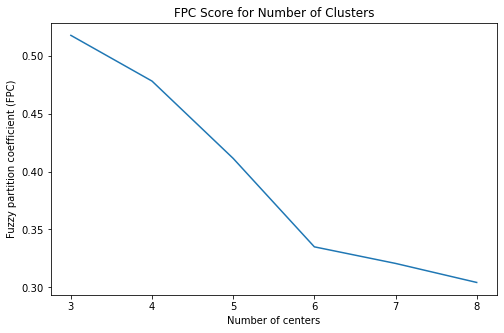

In [40]:
fig = plt.figure(figsize=(8, 5))
plt.plot(num_centers, fpcs)
plt.xlabel("Number of centers")
plt.ylabel("Fuzzy partition coefficient (FPC)")
plt.title("FPC Score for Number of Clusters")
plt.show()

In [41]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

In [42]:
def silhouette_analysis(X, num_centers_list):
    
    silhouette_avg_list = []
    
    for n_clusters in num_centers_list:

        cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
                    X, n_clusters, 2, error=0.005, maxiter=10, init=None)
        
        cluster_labels = u0.argmax(axis=0)
        X1 = np.column_stack((X[0],X[1]))
        
        silhouette_avg = silhouette_score(X1, cluster_labels)
        silhouette_avg_list.append(silhouette_avg)
        
        print(f"For number of clusters: {n_clusters}. " + 
              f"The average silhouette_score is {silhouette_avg}")
        
        fig, ax2 = plt.subplots(1, 1, figsize=(6, 5))
        
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X1[:, 0], X1[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        centers = cntr
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for Fuzzy clustering "
                        "with n_clusters = %d" % n_clusters),
                        fontsize=14, fontweight='bold')
    plt.show()
    
    return silhouette_avg_list

For number of clusters: 3. The average silhouette_score is -0.002606507786367668
For number of clusters: 4. The average silhouette_score is -0.006319089493859216
For number of clusters: 5. The average silhouette_score is -0.005839500567504731
For number of clusters: 6. The average silhouette_score is -0.010632827512195513
For number of clusters: 7. The average silhouette_score is -0.008847713599822319
For number of clusters: 8. The average silhouette_score is -0.009850409840781721


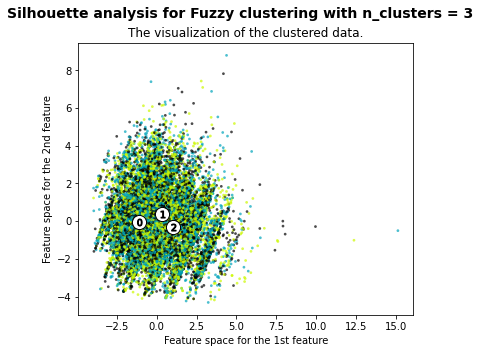

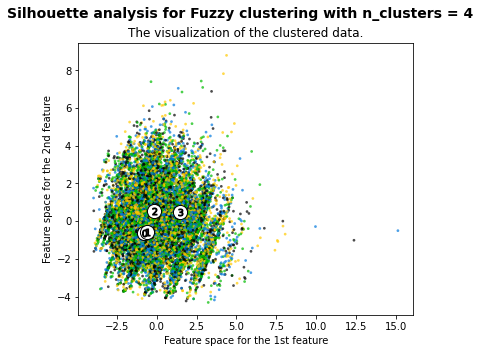

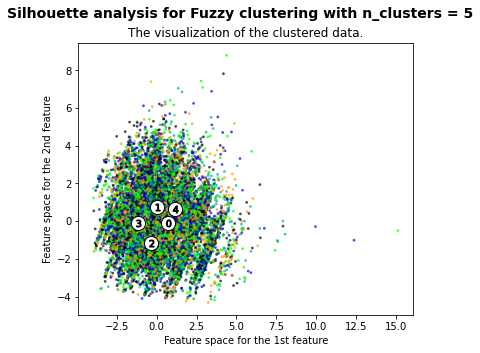

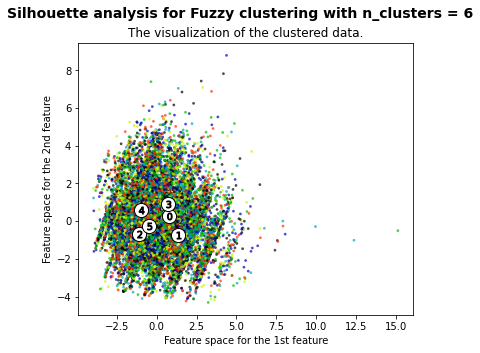

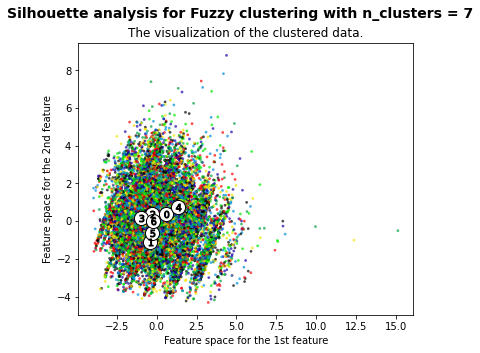

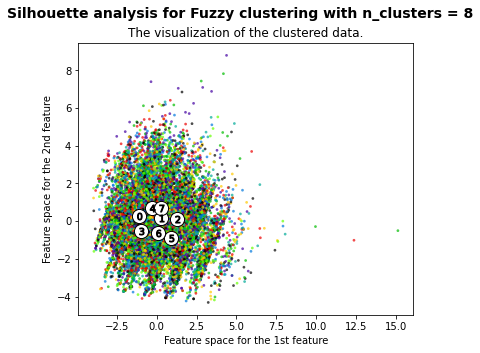

[-0.002606507786367668,
 -0.006319089493859216,
 -0.005839500567504731,
 -0.010632827512195513,
 -0.008847713599822319,
 -0.009850409840781721]

In [43]:
silhouette_analysis(alldata, num_centers)

From the silholuette , it can be concluded that the ideal number of centers for the dataset is 3 clusters.

## Trained Model

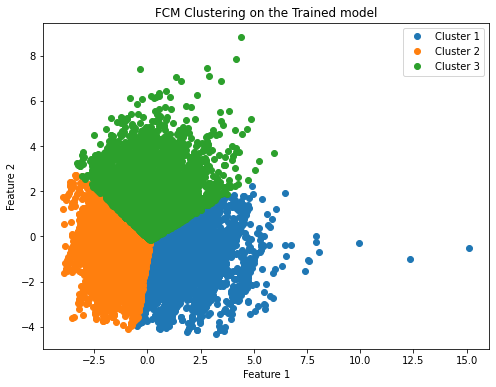

In [44]:
cntr, u_orig, _, _, _, _, _ = fuzz.cluster.cmeans(
    alldata, 3, 2, error=0.005, maxiter=1000)

fig = plt.figure(figsize=(8, 6))
for j in range(3):
    plt.plot(results['pca1'][u_orig.argmax(axis=0) == j],
             results['pca2'][u_orig.argmax(axis=0) == j], 'o',
             label=f'Cluster {str(j+1)}')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title('FCM Clustering on the Trained model')
plt.legend(loc="upper right")
plt.show()

In [45]:
cluster1_labels = u_orig.argmax(axis=0) == 0
cluster2_labels = u_orig.argmax(axis=0) == 1
cluster3_labels = u_orig.argmax(axis=0) == 2

In [46]:
fuzzy_clusters1 = cluster1_labels.astype(int)
fuzzy_clusters2 = cluster2_labels.astype(int)
fuzzy_clusters3 = cluster2_labels.astype(int)

In [47]:
encoded_df['FUZZY_CLUSTER1'] = fuzzy_clusters1
encoded_df['FUZZY_CLUSTER2'] = fuzzy_clusters2
encoded_df['FUZZY_CLUSTER3'] = fuzzy_clusters3

In [48]:
encoded_df

TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0            1                   0            1             0   
26           1                   0            0             0   
40           1                   0            1             0   
42           1                   0            0             0   
81           1                   0            0             0   
...        ...                 ...          ...           ...   
307448       1                   0            1             0   
307475       1                   0            0             0   
307481       1                   0            1             0   
307489       1                   0            0             0   
307509       1                   0            0             0   

        FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                     1             0          202500.0    406597.5   
26                    1             0          112500.0    979992.0   
40                    1             0          202500.0   1193580.0   
42                    0             0          135000.0    288873.0   
81                    1             0           81000.0    252000.0   
...                 ...           ...               ...         ...   
307448                0             1          207000.0    450000.0   
307475                0             1          144000.0   1303200.0   
307481                1             0          225000.0    297000.0   
307489                1             0          225000.0    521280.0   
307509                1             0          171000.0    370107.0   

        AMT_ANNUITY  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  \
0           24700.5                 5                    4   
26          27076.5                 5                    4   
40          35028.0                 0                    4   
42          16258.5                 5                    4   
81          14593.5                 2                    4   
...             ...               ...                  ...   
307448      32746.5                 5                    4   
307475      46809.0                 5                    1   
307481      19975.5                 5                    4   
307489      23089.5                 0                    4   
307509      20205.0                 0                    4   

        NAME_FAMILY_STATUS  DAYS_EMPLOYED  CNT_FAM_MEMBERS  \
0                        3           -637              1.0   
26                       4          -2628              1.0   
40                       1          -1262              2.0   
42                       0          -3597              2.0   
81                       1         365243              2.0   
...                    ...            ...              ...   
307448                   1          -3048              3.0   
307475                   0          -2405              3.0   
307481                   1          -3147              2.0   
307489                   0           -286              2.0   
307509                   1          -4786              2.0   

        REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                          2                            2   
26                         3                            2   
40                         2                            2   
42                         3                            3   
81                         2                            2   
...                      ...                          ...   
307448                     3                            3   
307475                     2                            2   
307481                     2                            2   
307489                     2                            2   
307509                     2                            2   

        WEEKDAY_APPR_PROCESS_START  AMT_REQ_CREDIT_BUREAU_HOUR  \
0                                6                         0.0   
26                 

In [49]:
X = encoded_df.iloc[:, 1:-3]

In [50]:
y = encoded_df.iloc[:,-3:]

## Training and Testing Data

In [51]:
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [53]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20)

In [54]:
# Square Nonlinearity
def SQNL(x):
    orig = x
    x = tf.where(orig > 2.0, (tf.ones_like(x)), x)
    x = tf.where(tf.logical_and(0.0 <= orig, orig <= 2.0),
                 (x - tf.math.square(x) / 4.), x)
    x = tf.where(tf.logical_and(-2.0 <= orig, orig < 0),
                 (x + tf.math.square(x) / 4.), x)
    return tf.where(orig < -2.0, -tf.ones_like(x), x)

In [55]:
# ElliotSig
def softsign(X):
    return X / (tf.math.abs(X) + 1)

In [56]:
# Inverse Square Root Function
def ISRU(X, alpha=0.1):
    return X / tf.math.sqrt(1 + alpha * tf.math.square(X))

In [57]:
from keras.models import Sequential
from keras.layers import Dense

In [58]:
from keras.layers import Activation
from keras.utils.generic_utils import get_custom_objects

In [59]:
get_custom_objects().update({'sqnl': Activation(SQNL)})

In [60]:
get_custom_objects().update({'softsign': Activation(softsign)})

In [61]:
get_custom_objects().update({'isru': Activation(ISRU)})

### Generic Neural Network Class for Testing Activation Functions

In [62]:
class NeuralNetworkModel:

    def __init__(self):
        self.model = None
        self.history = None

    def create(self, hidden_layers, actv_funct, input_cols):
        self.model = Sequential()
        self.model.add(Dense(hidden_layers[0], 
                             input_dim=input_cols, 
                             activation=actv_funct[0]))
        for layer in range(1, len(hidden_layers)):
            self.model.add(Dense(units=hidden_layers[layer], 
                                 activation=actv_funct[layer]))
        return self.model.summary()

    def compile(self, optimizer="adam", loss="mean_squared_error", metrics="accuracy"):
        self.model.compile(optimizer=optimizer, 
                           loss=loss, 
                           metrics=[metrics])
    
    def train(self, X_train, y_train, epochs=10, batch_size=1):
        self.history = self.model.fit(X_train, y_train, 
                                      epochs=epochs, 
                                      batch_size=batch_size)

    def train_val(self, X_train, y_train, X_val, y_val, epochs=10, batch_size=1):
        self.history = self.model.fit(X_train, y_train, 
                                      epochs=epochs, 
                                      batch_size=batch_size, 
                                      validation_data=(X_val, y_val),)

    def get_history(self):
        return self.history

    def evaluate(self, X_test, y_test):
        loss, accuracy = self.model.evaluate(X_test, y_test)
        return loss, accuracy

    def predict(self, X_test):
        y_pred = self.model.predict(X_test)
        return np.argmax(y_pred, axis=1)

    def plot_accuracy(self):
        accuray_values = self.history.history['accuracy']
        epochs = range(1, len(accuray_values) + 1)
        plt.plot(epochs, accuray_values, label='Training Accuracy')
        plt.title('Model Accuracy')
        plt.ylabel('Accuracy')
        plt.xlabel('Epochs')
        plt.legend()
        plt.show()

    def plot_loss(self):
        loss_values = self.history.history['loss']
        epochs = range(1, len(loss_values) + 1)
        plt.plot(epochs, loss_values, label='Training Loss')
        plt.title('Model Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()
        
    def plot_2D_pred(self, X_test, y_pred):
        pca = PCA(n_components=2).fit_transform(X_test)
        pca_cols = pd.DataFrame(pca,columns=['pca1','pca2'])
        pca_arr = np.vstack((pca_cols['pca1'], pca_cols['pca2']))

        plt.scatter(pca_arr[0],pca_arr[1],c=y_pred)
        plt.show()

    def plot_3D_pred(self, X_test, y_pred):
        pca = PCA(n_components=3).fit_transform(X_test)
        pca_cols = pd.DataFrame(pca,columns=['pca1','pca2','pca3'])
        pca_arr = np.vstack((pca_cols['pca1'], pca_cols['pca2'], pca_cols['pca3']))

        fig = plt.figure(figsize=(10, 8))
        ax = plt.axes(projection="3d")

        z_line = np.linspace(-20, 20, 1000)
        x_line = np.cos(z_line)
        y_line = np.sin(z_line)
        ax.plot3D(x_line, y_line, z_line, 'white')

        z_points = pca_cols['pca2']
        x_points = pca_cols['pca3']
        y_points = pca_cols['pca1']
        ax.scatter3D(x_points, y_points, z_points, c=y_pred);
        plt.show()

## K Fold Cross Validation

In [63]:
def split_data(X, y, folds):
    X_set = []
    y_set = []
    split_size = int(np.floor(X.shape[0] / folds))
    row_num = 0
    for k in range(folds):
        X_set.append(X.iloc[row_num:row_num + split_size, :].to_numpy())
        y_set.append(y.iloc[row_num:row_num + split_size, ].to_numpy())
        row_num += split_size
    return X_set, y_set

In [64]:
def kfoldCV(X, y, layers_list, actvation_list, folds):

    res = []
    res_arr = []
    testErrs = []
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
    
    trainArr_x, trainArr_y = split_data(X_train, y_train, folds=5)
    testArr_x, testArr_y = split_data(X_test, y_test, folds=5)
    
    for partition in range(folds):
        
        Xtrain = trainArr_x[partition]
        ytrain = trainArr_y[partition]
        Xtest = testArr_x[partition]
        ytest = testArr_y[partition]
        
        parition_arr = []
        
        for p in range(len(layers_list)):

            num_features = Xtrain.shape[1]
            layer = layers_list[p]
            actv_funct = actvation_list[p]
            
            model = NeuralNetworkModel()
            model.create(hidden_layers=layer, actv_funct=actv_funct, input_cols=num_features)
            model.compile()
            
            model.train(X_train, y_train, epochs=10, batch_size=10)
            
            model.plot_accuracy()
            model.plot_loss()
            
            test_loss, test_acc = model.evaluate(X_test, y_test)
            print(f'Model3 Accuracy: {test_acc}')
            print(f'Model3 Loss:     {test_loss}')
            
            parition_arr.append(test_acc)
        
        print(parition_arr)
        res.append(parition_arr)

    for partition in range(folds):
        
        Xtrain = trainArr_x[partition]
        ytrain = trainArr_y[partition]
        
        Xtest = testArr_x[partition]
        ytest = testArr_y[partition]
        
        max_value = max(res[partition])
        
        max_pos = np.where(np.asarray(res[partition]) == max(np.asarray(res[partition])))[0][0]
        res_arr.append([max_pos, max_value])

        num_features = trainArr_x[partition].shape[1]
        layer = layers_list[max_pos]
        actv_funct = actvation_list[max_pos]        
        
        model = NeuralNetworkModel()
        model.create(hidden_layers=layer, actv_funct=actv_funct, input_cols=num_features)
        model.compile()
                
        model.train(trainArr_x[partition], trainArr_y[partition], epochs=10, batch_size=10)
                
        model.plot_accuracy()
        model.plot_loss()    

        test_loss, test_acc = model.evaluate(testArr_x[partition], testArr_y[partition])
        print(f'Model3 Accuracy: {test_acc}')
        print(f'Model3 Loss:     {test_loss}')

    testErrs = [res[0] for res in res_arr]
    best_num_layer = max(set(testErrs), key=testErrs.count)
    print(f"Best Layer Value: {layers_list[best_num_layer]}")
    return layers_list[best_num_layer], actvation_list[best_num_layer]

In [65]:
hidden_nn_list =  [[50,50,3], [20,10,3], 
                   [100,50,20,3], [100,100,50,20,3]]
actv_funct_list = [["isru","isru","isru"], ["isru","isru","isru"],
                   ["isru","isru","isru","isru"],["isru","isru","isru","isru", "isru"]]

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                1150      
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 153       
Total params: 3,853
Trainable params: 3,853
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1986/1986 [==============================] - 2s 1ms/step - loss: 0.2347 - accuracy: 0.4185
Epoch 2/10
1986/1986 [==============================] - 2s 1ms/step - loss: 0.2098 - accuracy: 0.4245
Epoch 3/10
1986/1986 [==============================] - 2s 1ms/step - loss: 0.2073 - accuracy: 0.4279
Epoch 4/10
1986/1986 [==============================] - 2s 1ms/step - loss: 0.

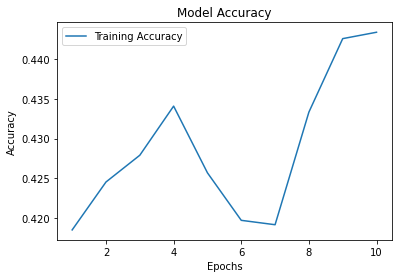

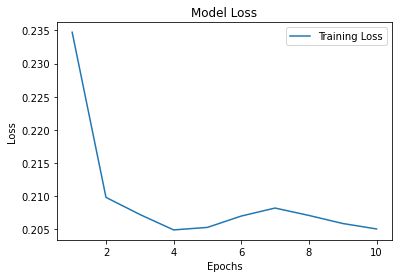

156/156 [==============================] - 0s 961us/step - loss: 0.1998 - accuracy: 0.3116
Model3 Accuracy: 0.3115810751914978
Model3 Loss:     0.19982071220874786
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 20)                460       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 33        
Total params: 703
Trainable params: 703
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1986/1986 [==============================] - 2s 1ms/step - loss: 0.2823 - accuracy: 0.3375
Epoch 2/10
1986/1986 [==============================] - 2s 1ms/step - loss: 0.2119 - accuracy: 0.4048
Epoch 3/10
1986/19

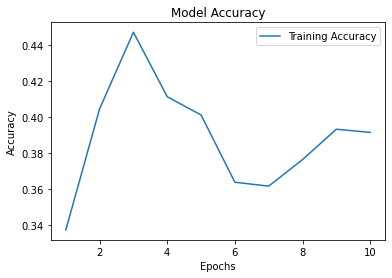

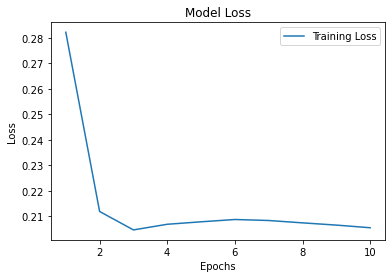

156/156 [==============================] - 0s 954us/step - loss: 0.2046 - accuracy: 0.2949
Model3 Accuracy: 0.29486405849456787
Model3 Loss:     0.20463553071022034
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 100)               2300      
_________________________________________________________________
dense_7 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_8 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_9 (Dense)              (None, 3)                 63        
Total params: 8,433
Trainable params: 8,433
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1986/1986 [==============================] - 2s 1ms/step - loss: 0.2093 - 

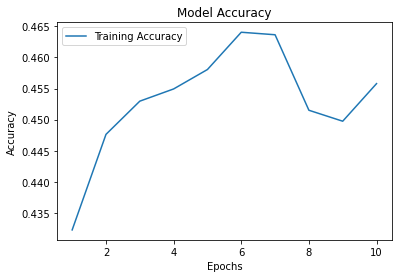

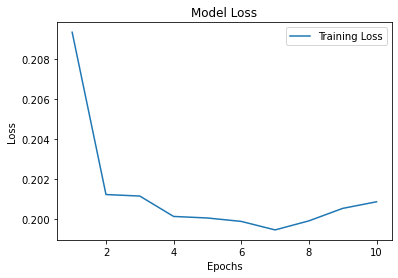

156/156 [==============================] - 0s 1ms/step - loss: 0.2005 - accuracy: 0.3756
Model3 Accuracy: 0.37562939524650574
Model3 Loss:     0.20048505067825317
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 100)               2300      
_________________________________________________________________
dense_11 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_12 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_13 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_14 (Dense)             (None, 3)                 63        
Total params: 18,533
Trainable params: 18,533
Non-trainable params: 0
___________________

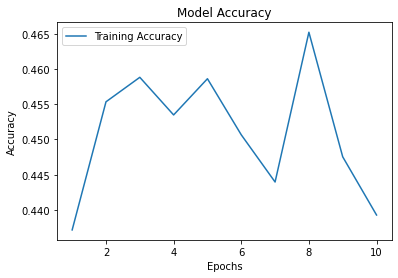

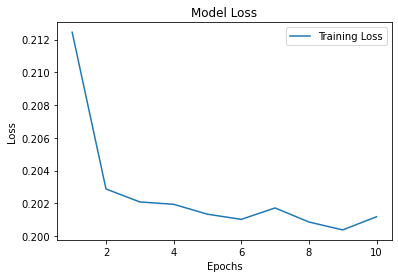

156/156 [==============================] - 0s 1ms/step - loss: 0.2066 - accuracy: 0.2030
Model3 Accuracy: 0.20302115380764008
Model3 Loss:     0.20658911764621735
[0.3115810751914978, 0.29486405849456787, 0.37562939524650574, 0.20302115380764008]
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 50)                1150      
_________________________________________________________________
dense_16 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_17 (Dense)             (None, 3)                 153       
Total params: 3,853
Trainable params: 3,853
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1986/1986 [==============================] - 2s 1ms/step - loss: 0.2421 - accuracy: 0.4246
Epoch 2/10
1986/1986 [===========

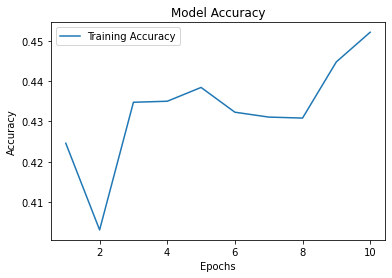

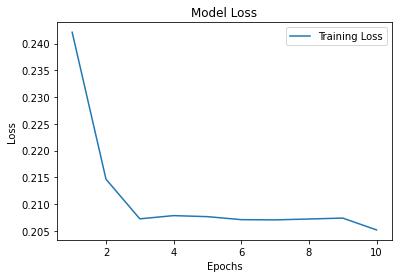

156/156 [==============================] - 0s 988us/step - loss: 0.2299 - accuracy: 0.3684
Model3 Accuracy: 0.3683786392211914
Model3 Loss:     0.22992978990077972
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 20)                460       
_________________________________________________________________
dense_19 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_20 (Dense)             (None, 3)                 33        
Total params: 703
Trainable params: 703
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1986/1986 [==============================] - 2s 1ms/step - loss: 0.2696 - accuracy: 0.4011
Epoch 2/10
1986/1986 [==============================] - 2s 1ms/step - loss: 0.2045 - accuracy: 0.4441
Epoch 3/10
1986/19

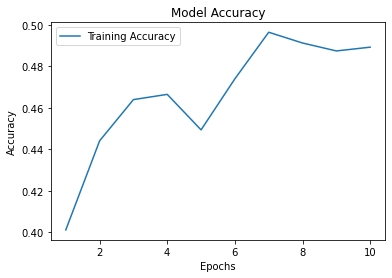

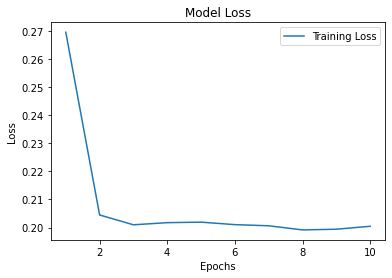

156/156 [==============================] - 0s 930us/step - loss: 0.1997 - accuracy: 0.4783
Model3 Accuracy: 0.47834843397140503
Model3 Loss:     0.19974443316459656
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 100)               2300      
_________________________________________________________________
dense_22 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_23 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_24 (Dense)             (None, 3)                 63        
Total params: 8,433
Trainable params: 8,433
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1986/1986 [==============================] - 3s 1ms/step - loss: 0.2237 - 

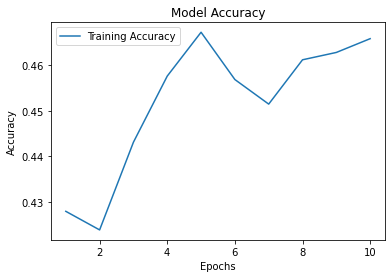

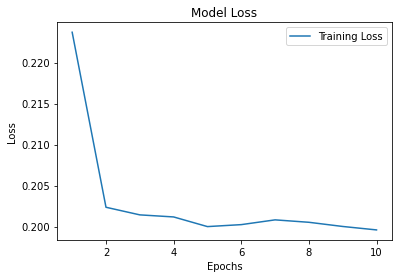

156/156 [==============================] - 0s 1ms/step - loss: 0.1983 - accuracy: 0.4910
Model3 Accuracy: 0.4910372495651245
Model3 Loss:     0.19827619194984436
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 100)               2300      
_________________________________________________________________
dense_26 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_27 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_28 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_29 (Dense)             (None, 3)                 63        
Total params: 18,533
Trainable params: 18,533
Non-trainable params: 0
____________________

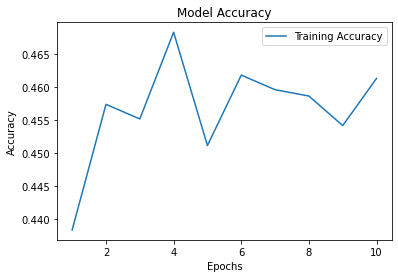

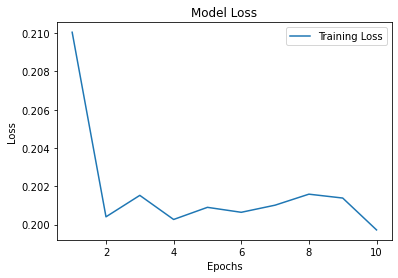

156/156 [==============================] - 0s 1ms/step - loss: 0.2047 - accuracy: 0.3464
Model3 Accuracy: 0.34642496705055237
Model3 Loss:     0.20469067990779877
[0.3683786392211914, 0.47834843397140503, 0.4910372495651245, 0.34642496705055237]
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 50)                1150      
_________________________________________________________________
dense_31 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_32 (Dense)             (None, 3)                 153       
Total params: 3,853
Trainable params: 3,853
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1986/1986 [==============================] - 2s 1ms/step - loss: 0.2393 - accuracy: 0.4112
Epoch 2/10
1986/1986 [============

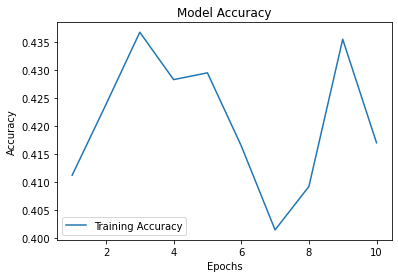

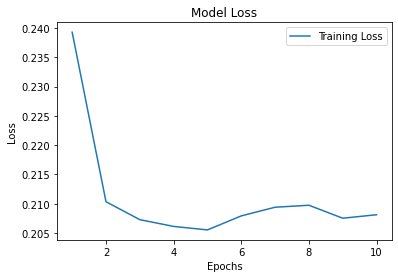

156/156 [==============================] - 0s 955us/step - loss: 0.2063 - accuracy: 0.3819
Model3 Accuracy: 0.38187310099601746
Model3 Loss:     0.2063073068857193
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 20)                460       
_________________________________________________________________
dense_34 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_35 (Dense)             (None, 3)                 33        
Total params: 703
Trainable params: 703
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1986/1986 [==============================] - 2s 1ms/step - loss: 0.2754 - accuracy: 0.4261
Epoch 2/10
1986/1986 [==============================] - 2s 1ms/step - loss: 0.2032 - accuracy: 0.4404
Epoch 3/10
1986/19

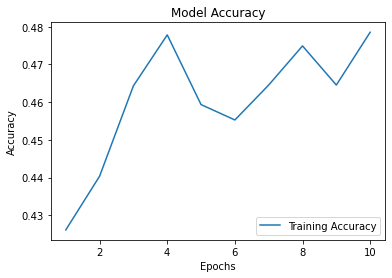

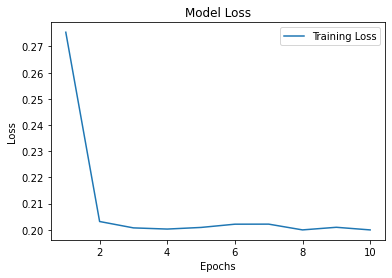

156/156 [==============================] - 0s 970us/step - loss: 0.1992 - accuracy: 0.3505
Model3 Accuracy: 0.3504531681537628
Model3 Loss:     0.19924193620681763
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 100)               2300      
_________________________________________________________________
dense_37 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_38 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_39 (Dense)             (None, 3)                 63        
Total params: 8,433
Trainable params: 8,433
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1986/1986 [==============================] - 3s 1ms/step - loss: 0.2216 - 

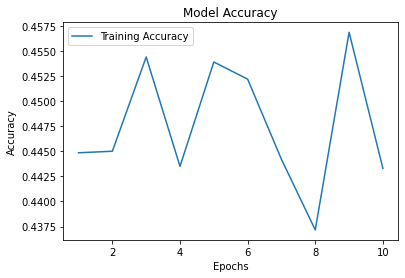

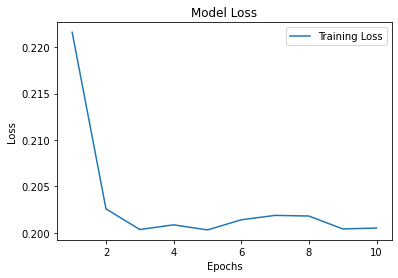

156/156 [==============================] - 0s 1ms/step - loss: 0.2093 - accuracy: 0.6874
Model3 Accuracy: 0.687411904335022
Model3 Loss:     0.20925137400627136
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 100)               2300      
_________________________________________________________________
dense_41 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_42 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_43 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_44 (Dense)             (None, 3)                 63        
Total params: 18,533
Trainable params: 18,533
Non-trainable params: 0
____________________

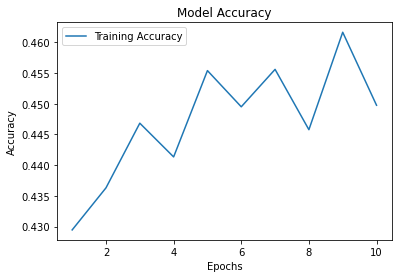

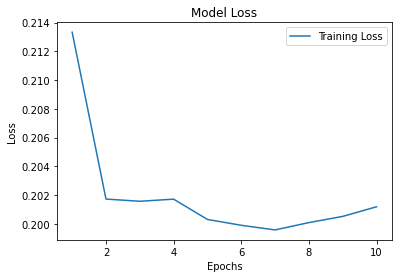

156/156 [==============================] - 0s 1ms/step - loss: 0.1990 - accuracy: 0.2749
Model3 Accuracy: 0.27492445707321167
Model3 Loss:     0.19903285801410675
[0.38187310099601746, 0.3504531681537628, 0.687411904335022, 0.27492445707321167]
Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 50)                1150      
_________________________________________________________________
dense_46 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_47 (Dense)             (None, 3)                 153       
Total params: 3,853
Trainable params: 3,853
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1986/1986 [==============================] - 2s 1ms/step - loss: 0.2469 - accuracy: 0.4126
Epoch 2/10
1986/1986 [============

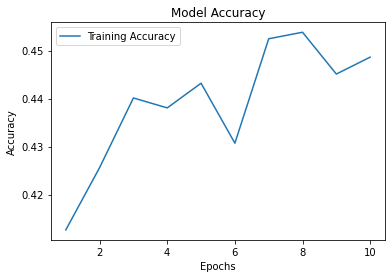

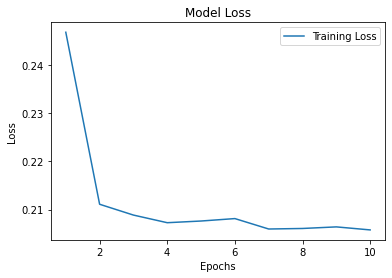

156/156 [==============================] - 0s 1ms/step - loss: 0.2016 - accuracy: 0.6320
Model3 Accuracy: 0.6320241689682007
Model3 Loss:     0.20156529545783997
Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 20)                460       
_________________________________________________________________
dense_49 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_50 (Dense)             (None, 3)                 33        
Total params: 703
Trainable params: 703
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1986/1986 [==============================] - 2s 1ms/step - loss: 0.2663 - accuracy: 0.4086
Epoch 2/10
1986/1986 [==============================] - 2s 1ms/step - loss: 0.2016 - accuracy: 0.4458
Epoch 3/10
1986/198

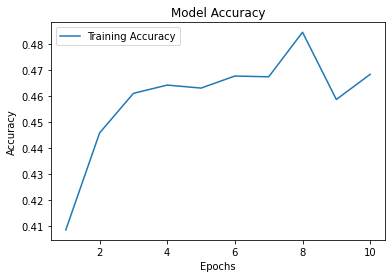

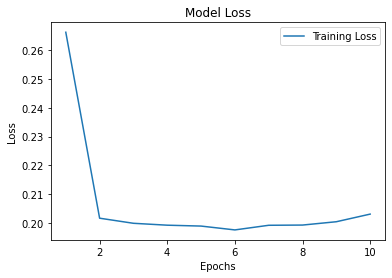

156/156 [==============================] - 0s 910us/step - loss: 0.2008 - accuracy: 0.4830
Model3 Accuracy: 0.482980877161026
Model3 Loss:     0.20081180334091187
Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_51 (Dense)             (None, 100)               2300      
_________________________________________________________________
dense_52 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_53 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_54 (Dense)             (None, 3)                 63        
Total params: 8,433
Trainable params: 8,433
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1986/1986 [==============================] - 3s 1ms/step - loss: 0.2135 - a

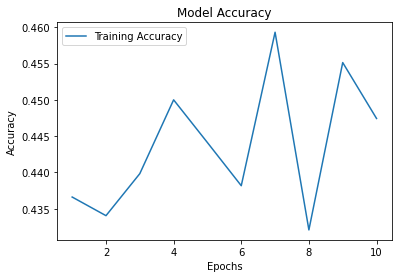

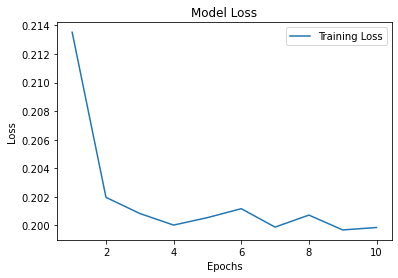

156/156 [==============================] - 0s 1ms/step - loss: 0.2065 - accuracy: 0.3251
Model3 Accuracy: 0.32507553696632385
Model3 Loss:     0.20651206374168396
Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, 100)               2300      
_________________________________________________________________
dense_56 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_57 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_58 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_59 (Dense)             (None, 3)                 63        
Total params: 18,533
Trainable params: 18,533
Non-trainable params: 0
__________________

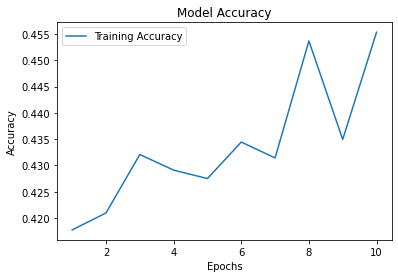

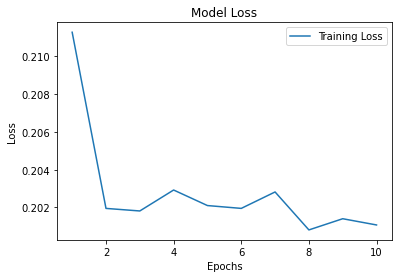

156/156 [==============================] - 0s 1ms/step - loss: 0.1984 - accuracy: 0.1551
Model3 Accuracy: 0.15508559346199036
Model3 Loss:     0.1983761042356491
[0.6320241689682007, 0.482980877161026, 0.32507553696632385, 0.15508559346199036]
Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 50)                1150      
_________________________________________________________________
dense_61 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_62 (Dense)             (None, 3)                 153       
Total params: 3,853
Trainable params: 3,853
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1986/1986 [==============================] - 2s 1ms/step - loss: 0.2633 - accuracy: 0.4223
Epoch 2/10
1986/1986 [=============

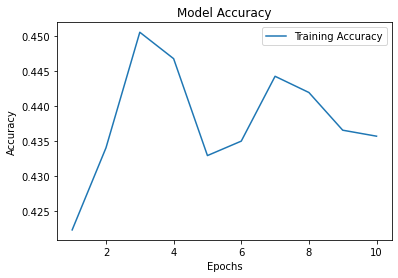

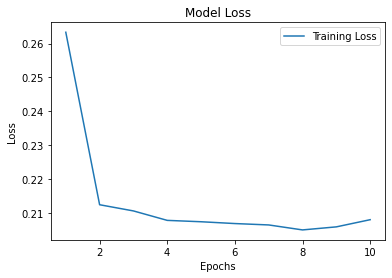

156/156 [==============================] - 0s 990us/step - loss: 0.2029 - accuracy: 0.6614
Model3 Accuracy: 0.6614300012588501
Model3 Loss:     0.20289289951324463
Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_63 (Dense)             (None, 20)                460       
_________________________________________________________________
dense_64 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_65 (Dense)             (None, 3)                 33        
Total params: 703
Trainable params: 703
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1986/1986 [==============================] - 2s 1ms/step - loss: 0.2892 - accuracy: 0.4345
Epoch 2/10
1986/1986 [==============================] - 2s 1ms/step - loss: 0.2062 - accuracy: 0.4343
Epoch 3/10
1986/1

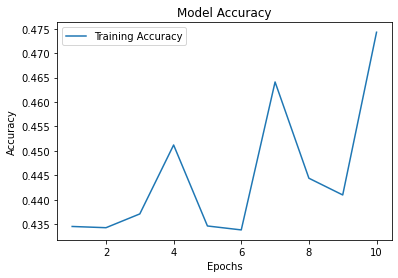

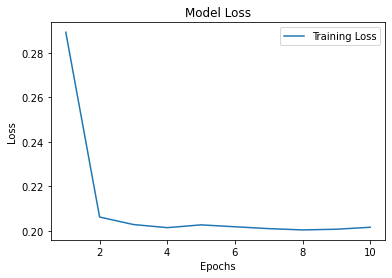

156/156 [==============================] - 0s 935us/step - loss: 0.2072 - accuracy: 0.0802
Model3 Accuracy: 0.08016112446784973
Model3 Loss:     0.20715202391147614
Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_66 (Dense)             (None, 100)               2300      
_________________________________________________________________
dense_67 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_68 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_69 (Dense)             (None, 3)                 63        
Total params: 8,433
Trainable params: 8,433
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1986/1986 [==============================] - 3s 1ms/step - loss: 0.2319 -

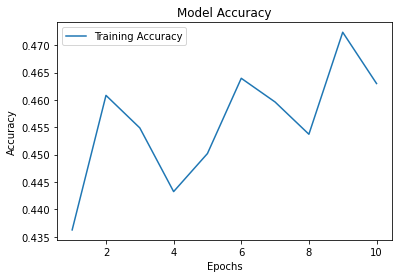

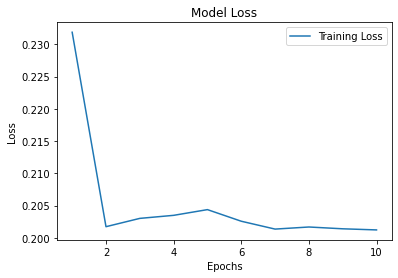

156/156 [==============================] - 0s 1ms/step - loss: 0.1993 - accuracy: 0.6246
Model3 Accuracy: 0.6245719790458679
Model3 Loss:     0.19931095838546753
Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_70 (Dense)             (None, 100)               2300      
_________________________________________________________________
dense_71 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_72 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_73 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_74 (Dense)             (None, 3)                 63        
Total params: 18,533
Trainable params: 18,533
Non-trainable params: 0
___________________

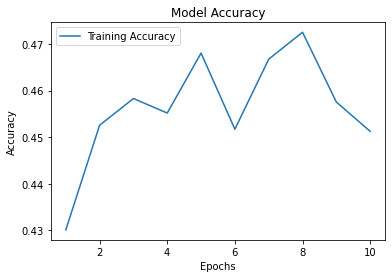

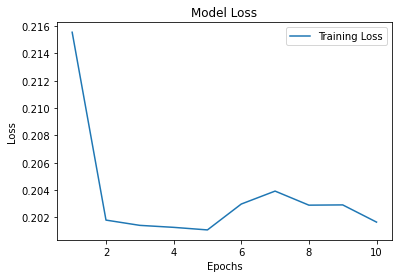

156/156 [==============================] - 0s 1ms/step - loss: 0.1992 - accuracy: 0.2326
Model3 Accuracy: 0.23262840509414673
Model3 Loss:     0.1992029994726181
[0.6614300012588501, 0.08016112446784973, 0.6245719790458679, 0.23262840509414673]
Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_75 (Dense)             (None, 100)               2300      
_________________________________________________________________
dense_76 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_77 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_78 (Dense)             (None, 3)                 63        
Total params: 8,433
Trainable params: 8,433
Non-trainable params: 0
_________________________________________________________________
Epoc

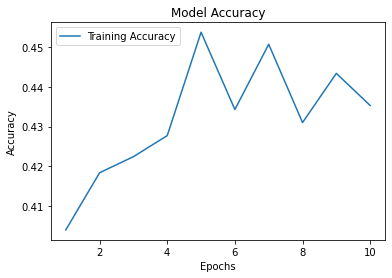

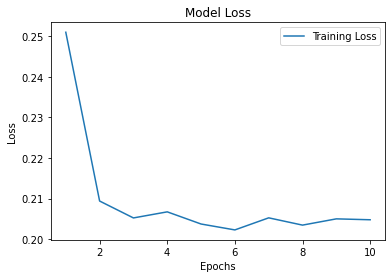

32/32 [==============================] - 0s 999us/step - loss: 0.1980 - accuracy: 0.3535
Model3 Accuracy: 0.35347431898117065
Model3 Loss:     0.19802717864513397
Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_79 (Dense)             (None, 100)               2300      
_________________________________________________________________
dense_80 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_81 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_82 (Dense)             (None, 3)                 63        
Total params: 8,433
Trainable params: 8,433
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
398/398 [==============================] - 1s 1ms/step - loss: 0.2321 - acc

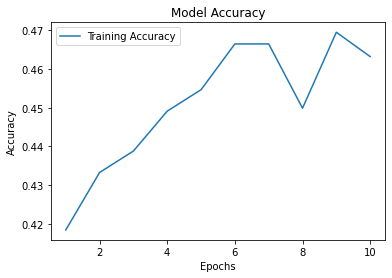

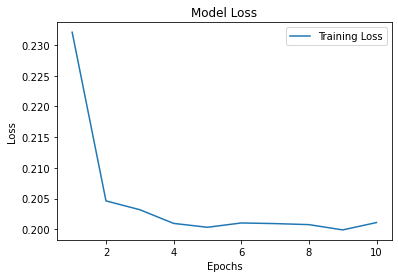

32/32 [==============================] - 0s 1ms/step - loss: 0.2013 - accuracy: 0.6435
Model3 Accuracy: 0.6435045599937439
Model3 Loss:     0.201320081949234
Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_83 (Dense)             (None, 100)               2300      
_________________________________________________________________
dense_84 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_85 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_86 (Dense)             (None, 3)                 63        
Total params: 8,433
Trainable params: 8,433
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
398/398 [==============================] - 1s 1ms/step - loss: 0.2901 - accuracy

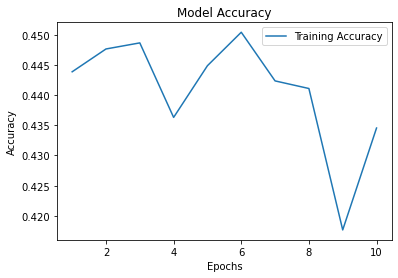

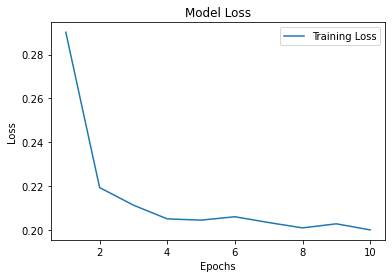

32/32 [==============================] - 0s 1ms/step - loss: 0.1984 - accuracy: 0.1621
Model3 Accuracy: 0.16213494539260864
Model3 Loss:     0.1983676701784134
Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_87 (Dense)             (None, 50)                1150      
_________________________________________________________________
dense_88 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_89 (Dense)             (None, 3)                 153       
Total params: 3,853
Trainable params: 3,853
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
398/398 [==============================] - 1s 1ms/step - loss: 0.3065 - accuracy: 0.4220
Epoch 2/10
398/398 [==============================] - 1s 1ms/step - loss: 0.2242 - accuracy: 0.4325
Epoch 3/10
398/398 [=

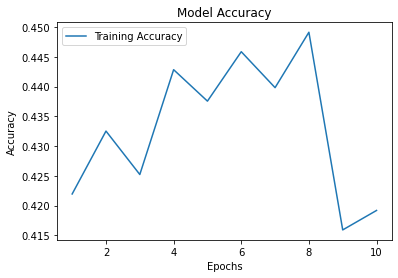

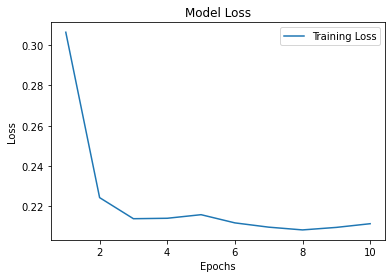

32/32 [==============================] - 0s 1ms/step - loss: 0.2148 - accuracy: 0.6556
Model3 Accuracy: 0.6555891036987305
Model3 Loss:     0.21476943790912628
Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_90 (Dense)             (None, 50)                1150      
_________________________________________________________________
dense_91 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_92 (Dense)             (None, 3)                 153       
Total params: 3,853
Trainable params: 3,853
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
398/398 [==============================] - 1s 1ms/step - loss: 0.2819 - accuracy: 0.4177
Epoch 2/10
398/398 [==============================] - 1s 1ms/step - loss: 0.2333 - accuracy: 0.4398
Epoch 3/10
398/398 [=

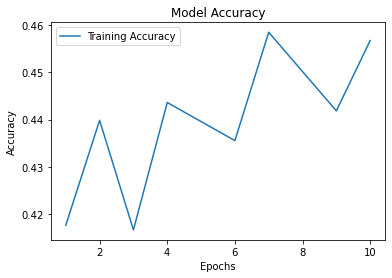

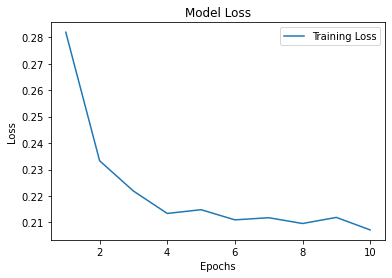

32/32 [==============================] - 0s 968us/step - loss: 0.2286 - accuracy: 0.6667
Model3 Accuracy: 0.6666666865348816
Model3 Loss:     0.2286393940448761
Best Layer Value: [100, 50, 20, 3]


In [66]:
nn_params, actv_params = kfoldCV(X, y, hidden_nn_list, actv_funct_list, folds=5)

In [67]:
print(f"Final Neural Netowk Layer Params: {nn_params}")
print(f"Final Activation Function Params: {actv_params}")

Final Neural Netowk Layer Params: [100, 50, 20, 3]
Final Activation Function Params: ['isru', 'isru', 'isru', 'isru']


Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_93 (Dense)             (None, 100)               2300      
_________________________________________________________________
dense_94 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_95 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_96 (Dense)             (None, 3)                 63        
Total params: 8,433
Trainable params: 8,433
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
1589/1589 [==============================] - 3s 2ms/step - loss: 0.2196 - accuracy: 0.4252 - val_loss: 0.1981 - val_accuracy: 0.3391
Epoch 2/20
1589/1589 [==============================] - 3s 2ms/step - loss: 0.2013 - accuracy: 0.4531 - v

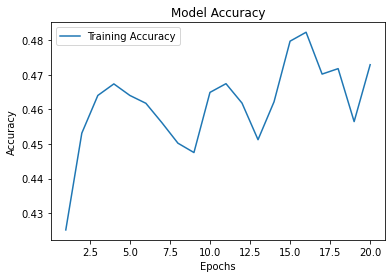

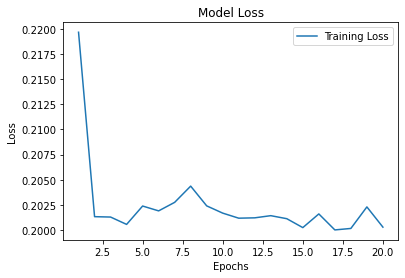

156/156 [==============================] - 0s 1ms/step - loss: 0.2038 - accuracy: 0.6516
Model3 Accuracy: 0.65156090259552
Model3 Loss:     0.20375175774097443


In [68]:
model = NeuralNetworkModel()
model.create(hidden_layers=nn_params, actv_funct=actv_params, input_cols=X_train.shape[1])
model.compile()
model.train_val(X_train, y_train, X_val, y_val, epochs=20, batch_size=10)
model.plot_accuracy()
model.plot_loss()
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Model3 Accuracy: {test_acc}')
print(f'Model3 Loss:     {test_loss}')

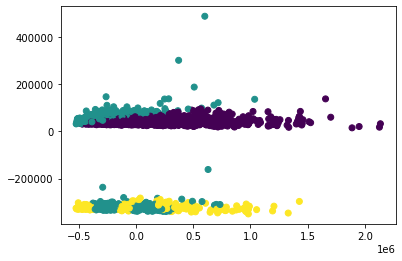

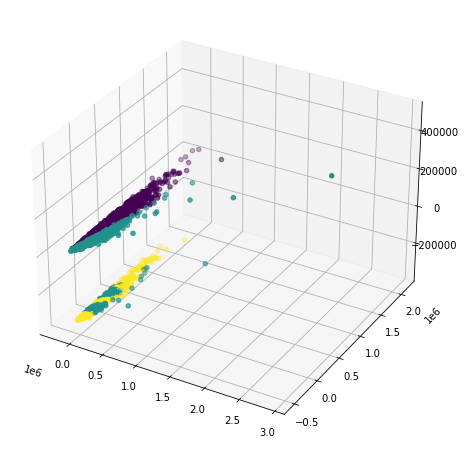

In [69]:
y_pred = model.predict(X_test)
model.plot_2D_pred(X_test, y_pred)
model.plot_3D_pred(X_test, y_pred)

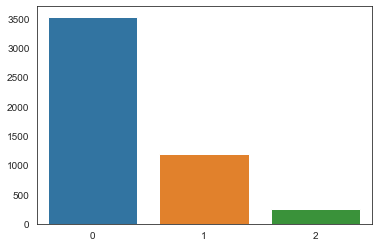

In [70]:
unique, counts = np.unique(y_pred, return_counts=True)
x = np.arange(len(unique))
width = 0.2
sns.axes_style('white')
sns.set_style('white')
ax = sns.barplot(x, counts)

## References
Madson Luiz Dantas Dias. fuzzy-c-means: An implementation of Fuzzy C-means clustering algorithm (2019). Federal University of Cear, Department of Computer Science. Retrieved from https://github.com/omadson/fuzzy-c-means

Moradi, S., Mokhatab Rafiei, F. A dynamic credit risk assessment model with data mining techniques: evidence from Iranian banks. Financ Innov 5, 15 (2019). Retrieved from https://doi.org/10.1186/s40854-019-0121-9